In [1]:
# import modules
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as st
from statistics import variance

## Question 1 

In [2]:
# load data 
data = yf.download("AAPL GOOG FB", start="2010-08-08", end="2020-08-08")['Close']

# change 10 years range to 8 years (there wasn't FB stocks before)
data = data[data['FB'].isna() == False]

# make indexes for future calculations
data['loc'] = [i for i in range(len(data))]

[*********************100%***********************]  3 of 3 completed


In [3]:
data.head()

,AAPL,FB,GOOG,loc
Date,,,,
2012-05-18,75.768570,38.230000,299.078979,0
2012-05-21,80.182854,34.029999,305.908386,1
2012-05-22,79.567146,31.000000,299.278229,2
2012-05-23,81.508568,32.000000,303.592072,3
2012-05-24,80.760002,33.029999,300.702881,4


## Question 2

 #### Compute returns $r_i = (P_{i+1} - P_{i}) / P_{i}$

In [4]:
# AAPL, FB, GOOG
for stock in data.columns[:3]:
    
    # list of returns values
    returns = []
    
    # try/except,because for today's stocks there isn't day+1 price 
    for index in data['loc']:
        
        try:
            r = (data[stock].iloc[index+1] - data[stock].iloc[index])/ (data[stock].iloc[index])
            returns.append(r)
            
        except:
            returns.append('0')
            
    # create column
    data[f'{stock} return'] = returns

# drop last row with today's stocks

data = data.iloc[:-1,:]

#### What is its distribution (Normal, t-student)

To define the best distribution will be used Kolmogorov-Smirnov test

In [5]:
# Compute statistics on the return time series

def best_distr(data):
    
    # Normal Gaussian distribution and t-student distribution
    distribution_names = ['norm','t']
    
    dist_results = []
    params = {}
    # calculations for every distribution
    for dist_name in distribution_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)
        params[dist_name] = param
        
        # Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    
    # store the name of the best fit and its p value
    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [6]:
best_distr(list(data['FB return'].values))

p value for norm = 6.720523083560512e-16
p value for t = 0.8830899394882844
Best fitting distribution: t
Best p value: 0.8830899394882844
Parameters for the best fit: (2.789972181586765, 0.0012097084281028894, 0.013559023520029061)


('t',
 0.8830899394882844,
 (2.789972181586765, 0.0012097084281028894, 0.013559023520029061))

In [7]:
best_distr(list(data['GOOG return'].values))

p value for norm = 9.168105875818143e-14
p value for t = 0.6336465364469229
Best fitting distribution: t
Best p value: 0.6336465364469229
Parameters for the best fit: (3.0656359007125467, 0.0009910039977890613, 0.00971246299480117)


('t',
 0.6336465364469229,
 (3.0656359007125467, 0.0009910039977890613, 0.00971246299480117))

In [8]:
best_distr(list(data['AAPL return'].values))

p value for norm = 1.0342177217365923e-12
p value for t = 0.6822013822080508
Best fitting distribution: t
Best p value: 0.6822013822080508
Parameters for the best fit: (3.1294209434024394, 0.0011453662236007081, 0.011169296596148376)


('t',
 0.6822013822080508,
 (3.1294209434024394, 0.0011453662236007081, 0.011169296596148376))

##### For each stock the best distribution is t-student distribution

#### Is the distribution stationary over time

Firstly, we can look to the plot of time series. Time series are stationary if they don't have trend or seasonal effects.

/Users/evgelver/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


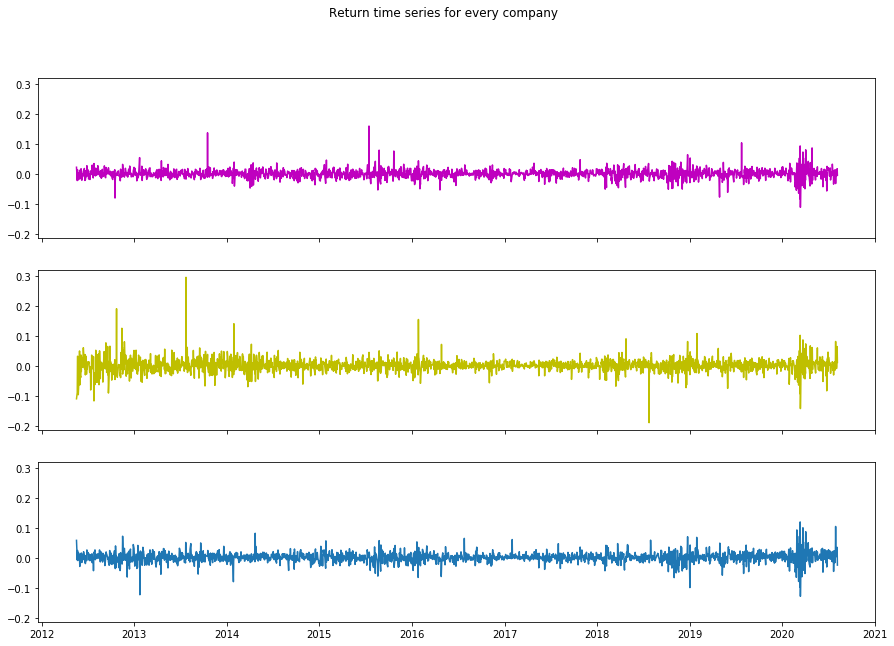

In [9]:
# All return time series
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x_1 = data.index.values
y_1 = data['GOOG return'].values

x_2 = data.index.values
y_2 = data['FB return'].values

x_3 = data.index.values
y_3 = data['AAPL return'].values



fig, axs = plt.subplots(3 ,sharex=True, sharey=True, figsize=(15,10))
fig.suptitle('Return time series for every company')
axs[0].plot(x_1,y_1, 'm')
axs[1].plot(x_2,y_2,'y')
axs[2].plot(x_3,y_3)

Secondly, Dickey-Fuller Test (test the null hypothesis). If $p$ value $> 0.05$, then data isn't time stationary

In [10]:
from statsmodels.tsa.stattools import adfuller

print('p value for GOOG stocks =', adfuller(data['GOOG return'])[1])
print('p value for AAPLstocks =', adfuller(data['AAPL return'])[1] )
print('p value for FB stocks =', adfuller(data['FB return'])[1] )

p value for GOOG stocks = 6.208666063026937e-21
p value for AAPLstocks = 8.108424620816886e-21
p value for FB stocks = 1.1472942983416559e-26


for each stock $p$ value $<$ 0.05 (null hypothesis is rejected), so all distributions are stationary over time

#### Auto-correlation in the time series

There is my local problem on my laptop. i wamted to build plot and look confidence intervals. if points are in interval => there isn't autocorrelation.

TypeError: ufunc 'multiply' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''

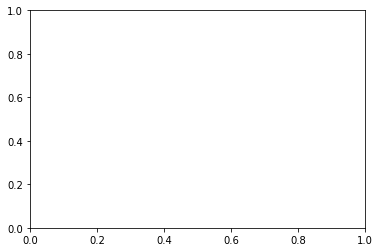

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data['AAPL return'].values)

TypeError: ufunc 'multiply' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''

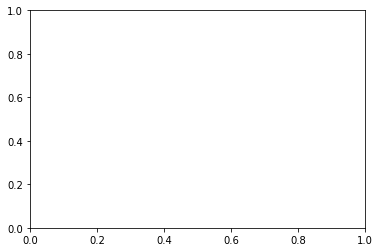

In [12]:
plot_acf(data['FB return'].values)

TypeError: ufunc 'multiply' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''

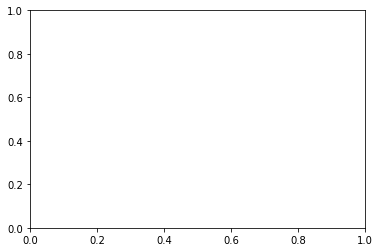

In [13]:
plot_acf(data['GOOG return'].values)

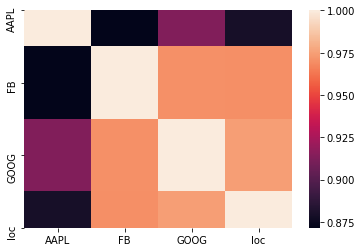

In [30]:
import seaborn as sn

sn.heatmap(data.corr())

#FB and GOOG highly correlated (p>0.95)

## Question 3

$pnl_i = f_i * r_i$

In [31]:
mu, sigma = 0, 1 # mean and standard deviation

# generate 9 random realizations of f_i (3 for every stock (AAPL, GOOG, FB))
number = 9
for i in range(number):
    data[f'f{i}'] = np.random.normal(mu, sigma, len(data))

for i in range(number):
    if i < 3:
        data[f'pnl{i}'] = data[f'f{i}']*data['AAPL return']
    elif (i >= 3) and (i <6):
        data[f'pnl{i}'] = data[f'f{i}']*data['FB return']
    else:
        data[f'pnl{i}'] = data[f'f{i}']*data['GOOG return']

In [32]:
data.head()

,AAPL,FB,GOOG,loc,AAPL return,FB return,GOOG return,f0,f1,f2,...,f8,pnl0,pnl1,pnl2,pnl3,pnl4,pnl5,pnl6,pnl7,pnl8
Date,,,,,,,,,,,,,,,,,,,,,
2012-05-18,75.768570,38.230000,299.078979,0,0.0582601,-0.109861,0.0228348,1.711530,-0.952300,0.200746,...,0.747378,0.0997139,-0.0554811,0.0116955,0.0250954,0.224893,-0.136913,0.0357449,0.0108925,0.0170662
2012-05-21,80.182854,34.029999,305.908386,1,-0.00767879,-0.0890391,-0.0216737,-1.489753,-2.180281,0.443048,...,1.032227,0.0114395,0.0167419,-0.00340207,0.0403891,0.0430379,-0.0626352,0.015156,0.0323088,-0.0223722
2012-05-22,79.567146,31.000000,299.278229,2,0.0243998,0.0322581,0.0144142,0.675087,-0.339369,-0.043326,...,-1.061950,0.016472,-0.00828054,-0.00105714,-0.050788,-0.019058,0.0634564,0.00559773,-0.00563625,-0.0153071
2012-05-23,81.508568,32.000000,303.592072,3,-0.00918389,0.0321875,-0.00951669,-3.075154,-2.237606,0.411653,...,0.131025,0.0282419,0.0205499,-0.00378058,0.0257883,0.0479394,-0.00779423,0.00893717,-0.00179275,-0.00124692
2012-05-24,80.760002,33.029999,300.702881,4,-0.00535985,-0.0339085,-0.020094,1.025163,-1.764022,0.127554,...,0.053323,-0.00549472,0.00945489,-0.00068367,0.00990493,-0.0167985,0.0455026,-0.00627798,0.0145744,-0.00107147


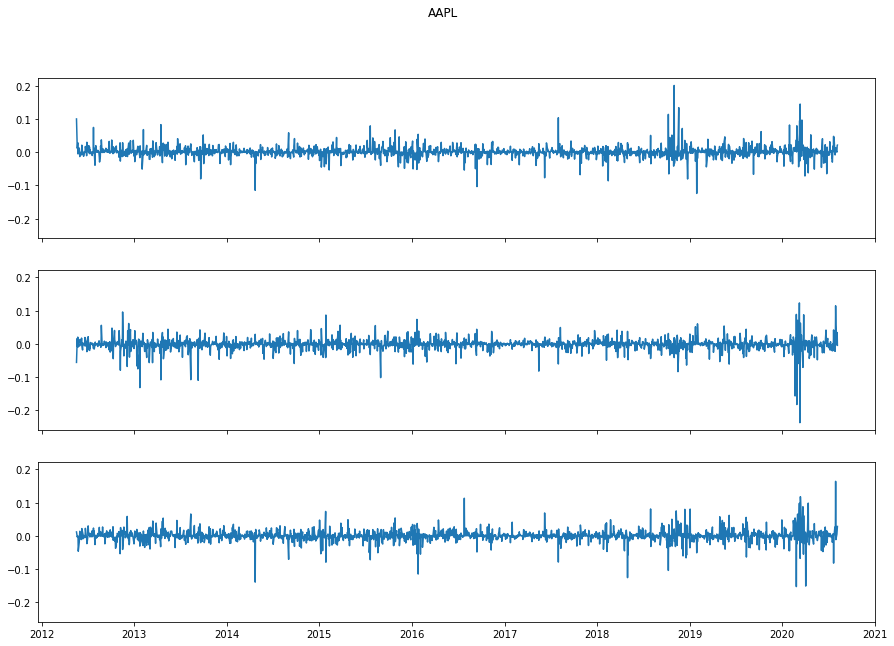

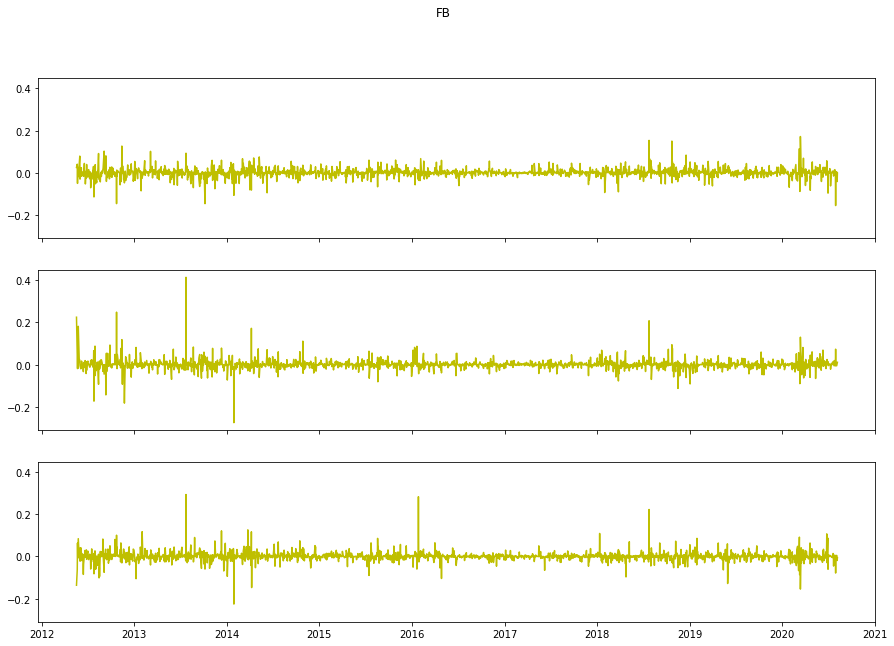

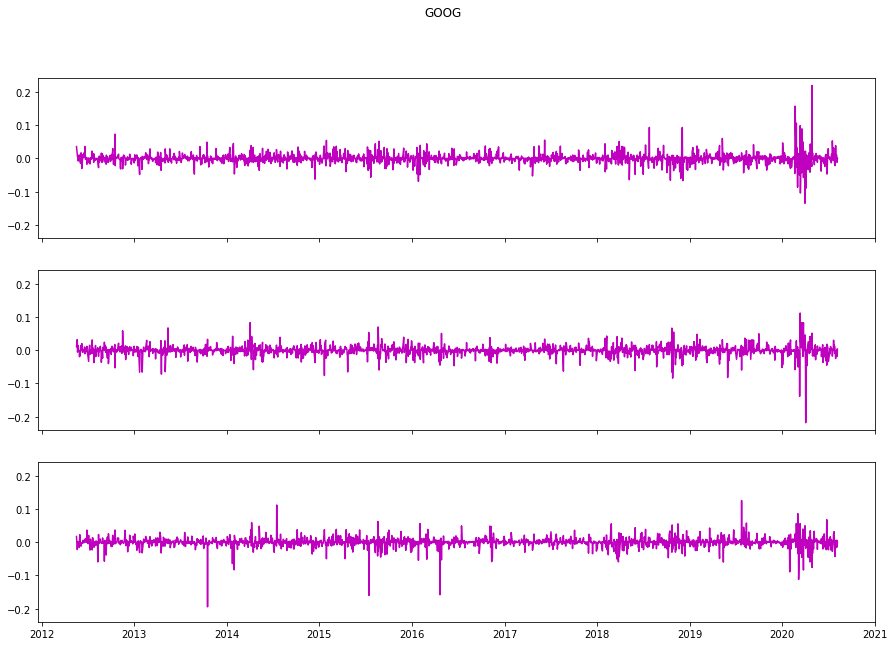

In [33]:
# AAPL plot

fig, axs = plt.subplots(3 ,sharex=True, sharey=True, figsize=(15,10))
fig.suptitle('AAPL')
axs[0].plot(data['pnl0'])
axs[1].plot(data['pnl1'])
axs[2].plot(data['pnl2'])

# FB plot
fig, axs = plt.subplots(3 ,sharex=True, sharey=True, figsize=(15,10))
fig.suptitle('FB')
axs[0].plot(data['pnl3'], 'y')
axs[1].plot(data['pnl4'], 'y')
axs[2].plot(data['pnl5'], 'y')

# GOOG plot
fig, axs = plt.subplots(3 ,sharex=True, sharey=True, figsize=(15,10))
fig.suptitle('GOOG')
axs[0].plot(data['pnl6'], 'm')
axs[1].plot(data['pnl7'], 'm')
axs[2].plot(data['pnl8'], 'm')

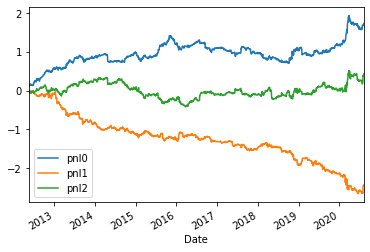

In [34]:
# cumsum(pnl) for AAPL
data[['pnl0','pnl1','pnl2']].sort_index().cumsum().plot()

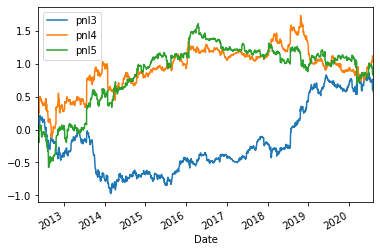

In [35]:
# cumsum(pnl) for FB
data[['pnl3','pnl4','pnl5']].sort_index().cumsum().plot()

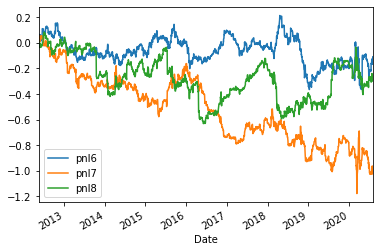

In [36]:
# cumsum(pnl) for GOOG
data[['pnl6','pnl7','pnl8']].sort_index().cumsum().plot()

## Question 4

$SR = E[pnl_i] / \sqrt{Var[pnl_i]}$

$pnl_i = f_i * r_i$  => 


1. $E[pnl_i] = E[f_i*r_i] = r_i*E[f_i] = r_i*p_i*(\sum_i f_i)$
2. $D[pnl_i] = D[f_i*r_i] = r_i^2*D[f_i]$

In [38]:
# AAPL: pnl0, pnl1, pnl2
# FB: pnl3, pnl4, pnl6
# GOOG: pnl6, pnl7, pnl8

data_AAPL = data[['AAPL return','pnl0', 'pnl1','pnl2']]
data_FB = data[['FB return','pnl3', 'pnl4','pnl5']]
data_GOOG = data[['GOOG return','pnl6', 'pnl7','pnl8']]

# probability =1/3 (array consits of 3 elements)
probability = 1/3

data_AAPL['E'] = data_AAPL['AAPL return']*probability*(data_AAPL['pnl0']+data_AAPL['pnl1']+data_AAPL['pnl2'])

data_AAPL['D'] = [(data_AAPL['AAPL return'][i]**2)*variance([data_AAPL['pnl0'][i],data_AAPL['pnl1'][i],data_AAPL['pnl2'][i]]) for i in range(len(data_AAPL))]

data['SR AAPL'] = data_AAPL['E']/np.sqrt(data_AAPL['D'])

# probability
probability = 1/data_FB.shape[1]

data_FB['E'] = data_FB['FB return']*probability*(data_FB['pnl3']+data_FB['pnl4']+data_FB['pnl5'])

data_FB['D'] = [(data_FB['FB return'][i]**2)*variance([data_FB['pnl3'][i],data_FB['pnl4'][i],data_FB['pnl5'][i]]) for i in range(len(data_FB))]

data['SR FB'] = data_FB['E']/np.sqrt(data_FB['D'])

# probability
probability = 1/data_GOOG.shape[1]

data_GOOG['E'] = data_GOOG['GOOG return']*probability*(data_GOOG['pnl6']+data_GOOG['pnl7']+data_GOOG['pnl8'])

data_GOOG['D'] = [(data_GOOG['GOOG return'][i]**2)*variance([data_GOOG['pnl6'][i],data_GOOG['pnl7'][i],data_GOOG['pnl8'][i]]) for i in range(len(data_GOOG))]

data['SR GOOG'] = data_GOOG['E']/np.sqrt(data_GOOG['D'])

/Users/evgelver/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/evgelver/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/evgelver/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [39]:
data.head()

,AAPL,FB,GOOG,loc,AAPL return,FB return,GOOG return,f0,f1,f2,...,pnl2,pnl3,pnl4,pnl5,pnl6,pnl7,pnl8,SR AAPL,SR FB,SR GOOG
Date,,,,,,,,,,,,,,,,,,,,,
2012-05-18,75.768570,38.230000,299.078979,0,0.0582601,-0.109861,0.0228348,1.711530,-0.952300,0.200746,...,0.0116955,0.0250954,0.224893,-0.136913,0.0357449,0.0108925,0.0170662,0.239531,-0.155982,1.23076
2012-05-21,80.182854,34.029999,305.908386,1,-0.00767879,-0.0890391,-0.0216737,-1.489753,-2.180281,0.443048,...,-0.00340207,0.0403891,0.0430379,-0.0626352,0.015156,0.0323088,-0.0223722,-0.791042,-0.0862584,-0.224314
2012-05-22,79.567146,31.000000,299.278229,2,0.0243998,0.0322581,0.0144142,0.675087,-0.339369,-0.043326,...,-0.00105714,-0.050788,-0.019058,0.0634564,0.00559773,-0.00563625,-0.0153071,0.186828,-0.0270865,-0.366694
2012-05-23,81.508568,32.000000,303.592072,3,-0.00918389,0.0321875,-0.00951669,-3.075154,-2.237606,0.411653,...,-0.00378058,0.0257883,0.0479394,-0.00779423,0.00893717,-0.00179275,-0.00124692,-0.89756,0.587401,-0.24396
2012-05-24,80.760002,33.029999,300.702881,4,-0.00535985,-0.0339085,-0.020094,1.025163,-1.764022,0.127554,...,-0.00068367,0.00990493,-0.0167985,0.0455026,-0.00627798,0.0145744,-0.00107147,-0.143115,-0.308811,-0.166428


$Hit rate = 1/n \sum_i (sign(f_i) == sign(r_i))$

In [40]:
# for all f_i
hit_rates_AAPL = []
hit_rates_FB = []
hit_rates_GOOG = []

for i in range(9):
    # f0,f1,f2 --> AAPL
    if i < 3:
        n = data[np.sign(data[f'f{i}']) == np.sign(data['AAPL return'])].shape[0]
        hitrate = np.sum(data[np.sign(data[f'f{i}']) == np.sign(data['AAPL return'])][f'f{i}'])/n
        hit_rates_AAPL.append(hitrate)
    
    # f3,f4,f5 --> FB
    elif (i >= 3) and (i <6):
        n = data[np.sign(data[f'f{i}']) == np.sign(data['FB return'])].shape[0]
        hitrate = np.sum(data[np.sign(data[f'f{i}']) == np.sign(data['FB return'])][f'f{i}'])/n
        hit_rates_FB.append(hitrate)
    
    # f6,f7,f8 --> GOOG
    else:
        n = data[np.sign(data[f'f{i}']) == np.sign(data['GOOG return'])].shape[0]
        hitrate = np.sum(data[np.sign(data[f'f{i}']) == np.sign(data['GOOG return'])][f'f{i}'])/n
        hit_rates_GOOG.append(hitrate)

In [41]:
# dataframe of hitrates
HR = pd.DataFrame([hit_rates_AAPL,hit_rates_FB,hit_rates_GOOG]).transpose()
HR = HR.rename(columns={0:'AAPL',1:'FB',2:'GOOG'})
HR

,AAPL,FB,GOOG
0,0.026906,0.076491,0.026416
1,0.042310,0.066126,-0.012469
2,0.021125,0.066736,0.050869


In [ ]:
# distribution of the SR(pnl_i) given f_i
